In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
xs = np.arange(-5,5,0.25) #5 not included
print(xs)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


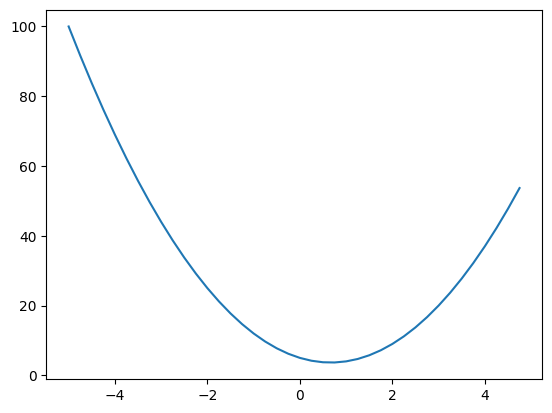

In [ ]:
plt.plot(xs,f(xs))


In [ ]:
#slope/gradient/sensitivity = (f(x+h) - f(x))/h at x=3
x=3.0
h=0.0001
slope = (f(x+h) - f(x))/h
print(slope)

14.000300000063248


In [ ]:
class Value:
  def __init__(self,data,_children = (),_op='',label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.grad = 0.0
    self._backward = lambda: None
    self.label = label

  def __add__(self,other): #operator overloading #tunder functions #private has double__ #_ access modifier #protected has single _
    out = Value(self.data + other.data, (self,other),'+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data, (self,other),'*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def __repr__(self):
    return f"Value(data={self.data})"


  def tanh(self):
    x = self.data
    t = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
    out = Value(t, (self,), 'tanh')

    def _backward():
      # Gradient of tanh(x) is 1 - tanh(x)^2
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    return out

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L' #loss function

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % ( n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

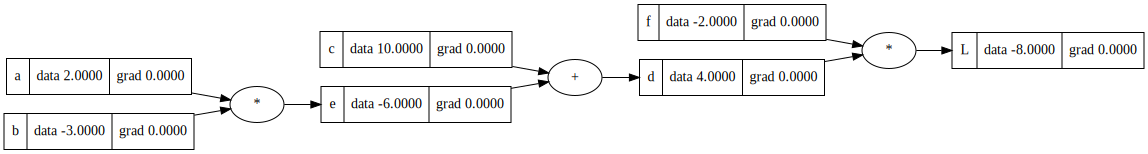

In [ ]:
draw_dot(L)

In [ ]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
b.grad = -4.0
a.grad = 6.0

In [ ]:
#AutoDiff
#L = f*d
#d(L)/d(f) = d(f*d)/d(f)

#d(L)/d(c) = d(L)/d(d)*d(d)/d(c) =


#ReLU: rectified linear unit (-inf,0)=0,0=0,(0,inf)=(x=y)
#tanh : non-linear : activation function (-1,1)

In [ ]:
a.data += 0.01*a.grad
b.data += 0.01*b.grad
c.data += 0.01*c.grad
f.data += 0.01*f.grad


In [ ]:
e = a*b
d = e+c
L = d*f

print(L.data)

-7.286496


In [ ]:
#Neural Net
#back-propagation.
#input to network
x1 = Value( 2.0, label='x1')
x2 = Value( 0.0, label='x2')

#weights of the network
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bais of the network
b=Value(6.88, label='b')

x1w1= x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

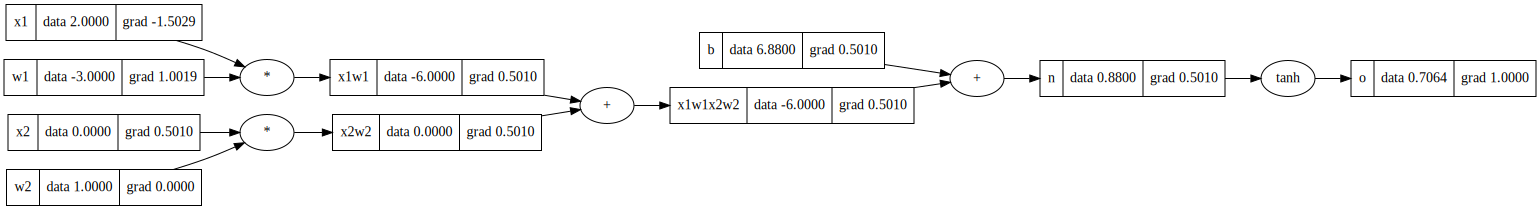

In [ ]:
draw_dot(o)

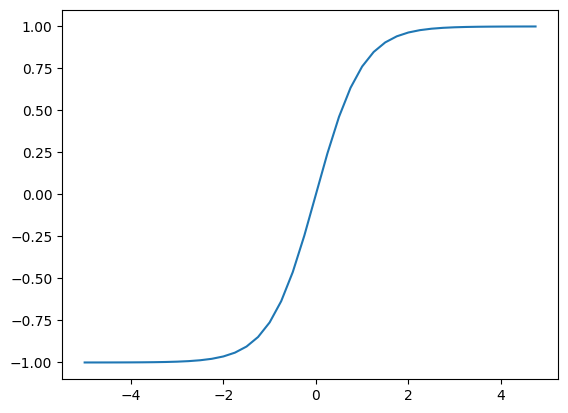

In [ ]:
plt.plot(np.arange(-5,5,0.25),np.tanh(np.arange(-5,5,0.25)))

In [ ]:
o.grad = 1.0


In [ ]:
o._backward()

In [ ]:
n._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x1w1._backward()
x2w2._backward()